# AG קבוצת 
#### גיל אברמוביץ - 314722372
#### דור נתן - 315533067
#### תומר לוי - 313245565
#### אוהד אדוארד - 
## אנו בחרנו לנתח את הדאטה של מדד החופש הכלכלי לשנת 2019
##### הדאטה מבוססת על נתונים מהספר  (http://www.iberglobal.com/files/2019-1/economic_freedom_index_2019.pdf) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse

In [2]:
url = 'https://raw.githubusercontent.com/Gil0504/Largest-Companies-in-the-World/main/economic_freedom_index2019_data_new1.csv' 
data_eco_free = pd.read_csv(url)
print(len(data_eco_free))
data_eco_free.head()

186


,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
0,1,Afghanistan,Afghanistan,Asia-Pacific,152.0,39.0,51.5,19.6,29.6,25.2,...,Afghanistan,35.5,$69.6,2.5,2.9,"$1,958",8.8,5.0,53.9,7.3
1,2,Albania,Albania,Europe,52.0,27.0,66.5,54.8,30.6,40.4,...,Albania,2.9,$36.0,3.9,2.5,"$12,507",13.9,2.0,"1,119.10",71.2
2,3,Algeria,Algeria,Middle East and North Africa,171.0,14.0,46.2,31.6,36.2,28.9,...,Algeria,41.5,$632.9,2.0,3.1,"$15,237",10,5.6,"1,203.00",25.8
3,4,Angola,Angola,Sub-Saharan Africa,156.0,33.0,50.6,35.9,26.6,20.5,...,Angola,28.2,$190.3,0.7,2.9,"$6,753",8.2,31.7,"-2,254.50",65.3
4,5,Argentina,Argentina,Americas,148.0,26.0,52.2,47.8,44.5,33.5,...,Argentina,44.1,$920.2,2.9,0.7,"$20,876",8.7,25.7,"11,857.00",52.6


In [3]:
data_eco_free = data_eco_free.dropna()
print(len(data_eco_free))
data_eco_free.dtypes

173


CountryID                        int64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2019 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Country                         object
Population (Millions)    

In [4]:
data_eco_free['GDP (Billions, PPP)'] = data_eco_free['GDP (Billions, PPP)'].str.replace('$', '')
data_eco_free['GDP (Billions, PPP)'] = data_eco_free['GDP (Billions, PPP)'].str.replace(',', '').astype('float')
data_eco_free['GDP per Capita (PPP)'] = data_eco_free['GDP per Capita (PPP)'].str.replace('$', '')
data_eco_free['GDP per Capita (PPP)'] = data_eco_free['GDP per Capita (PPP)'].str.replace(',', '').astype('float')

In [5]:
data_eco_free['Unemployment (%)'] = data_eco_free['Unemployment (%)'].astype('float')
data_eco_free['Population (Millions)'] = data_eco_free['Population (Millions)'].astype('float')
data_eco_free.dtypes

CountryID                        int64
Country Name                    object
WEBNAME                         object
Region                          object
World Rank                     float64
Region Rank                    float64
2019 Score                     float64
Property Rights                float64
Judical Effectiveness          float64
Government Integrity           float64
Tax Burden                     float64
Gov't Spending                 float64
Fiscal Health                  float64
Business Freedom               float64
Labor Freedom                  float64
Monetary Freedom               float64
Trade Freedom                  float64
Investment Freedom             float64
Financial Freedom              float64
Tariff Rate (%)                float64
Income Tax Rate (%)            float64
Corporate Tax Rate (%)         float64
Tax Burden % of GDP            float64
Gov't Expenditure % of GDP     float64
Country                         object
Population (Millions)    

### ------------------------------------------------------------------------

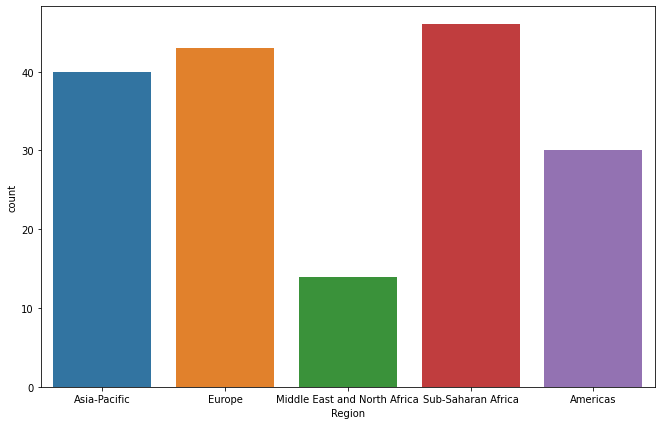

In [6]:
fig = plt.subplots(figsize=(11, 7))
sns.countplot( x="Region", data=data_eco_free)
plt.show()

#### הגרף מתאר את כמות המדינות שבדאטה
#### לפי כל אזור

In [7]:
rank_max = data_eco_free.groupby('Country Name')[['World Rank','Population (Millions)','GDP per Capita (PPP)','Region','2019 Score']].max()
rank_max.sort_values(by=['World Rank'],ascending=True).head()

,World Rank,Population (Millions),GDP per Capita (PPP),Region,2019 Score
Country Name,,,,,
Hong Kong,1.0,7.4,61393.0,Asia-Pacific,90.2
Singapore,2.0,5.6,93906.0,Asia-Pacific,89.4
New Zealand,3.0,4.8,38934.0,Asia-Pacific,84.4
Switzerland,4.0,8.4,61422.0,Europe,81.9
Australia,5.0,24.8,50334.0,Asia-Pacific,80.9


#### טבלת דירוג המדינות של מדד החופש הכללי 

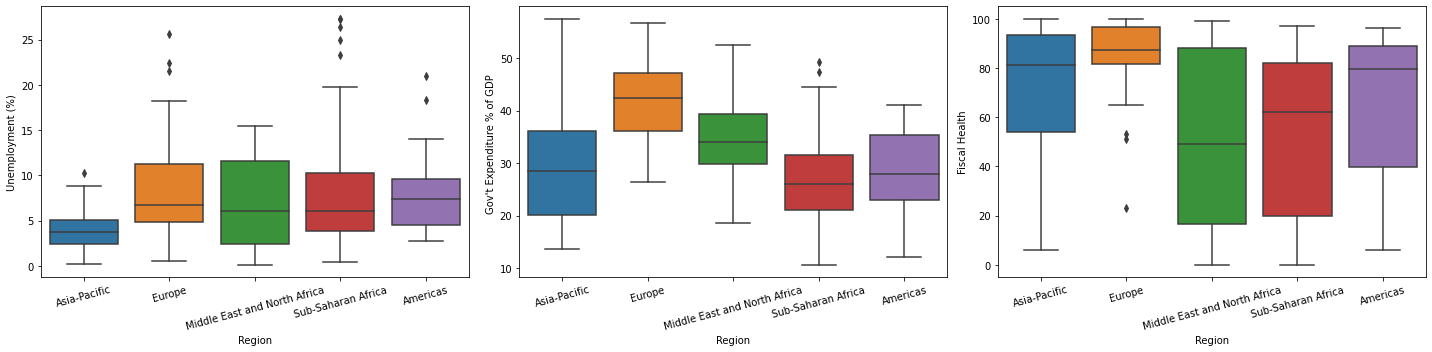

In [8]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
sns.boxplot(ax=axes[0], x='Region', y='Unemployment (%)', data=data_eco_free)
sns.boxplot(ax=axes[1], x='Region', y="Gov\'t Expenditure % of GDP ", data=data_eco_free)
sns.boxplot(ax=axes[2], x='Region', y='Fiscal Health', data=data_eco_free)
for i, ax in enumerate(fig.axes):
    axes[i].tick_params(axis='x', rotation=15) 
plt.tight_layout()
plt.show()

#### השוואת האוזרים לפי פרמטרים שונים

##### אחוז האבטלה לפי האזורים  

##### אחוז הוצאות הממשלה פר נפש לפי האזורים

##### דירוג הבריאות הכלכלית של אזרחים במדינות לפי האזורים

In [9]:
Expenditure_of_GDP_max = data_eco_free.groupby('Country Name')[['World Rank','Population (Millions)','Gov\'t Expenditure % of GDP ','Region']].max()
Expenditure_of_GDP_max.sort_values(by=['Gov\'t Expenditure % of GDP '],ascending=False).head()

,World Rank,Population (Millions),Gov't Expenditure % of GDP,Region
Country Name,,,,
Timor-Leste,172.0,1.2,57.5,Asia-Pacific
France,71.0,64.8,56.6,Europe
Finland,20.0,5.5,55.6,Europe
Denmark,14.0,5.7,53.4,Europe
Belgium,48.0,11.4,53.2,Europe


##### טבלת דירוג המדינות לפי הוצאות הממשלה לנפש 

In [10]:
GDP_max = data_eco_free.groupby('Country Name')[['World Rank','GDP (Billions, PPP)',]].max()
GDP_max.sort_values(by=['GDP (Billions, PPP)'],ascending=False).head()

,World Rank,"GDP (Billions, PPP)"
Country Name,,
China,100.0,23159.1
United States,12.0,19390.6
India,129.0,9459.0
Japan,30.0,5428.8
Germany,24.0,4170.8


#### טבלת דירוג המדינות לפי גובה התוצר למדינה 

##### סין מובילה בדירוג המדינות

In [11]:
GDP_Capita_max = data_eco_free.groupby('Country Name')[['World Rank','GDP per Capita (PPP)']].max()
GDP_Capita_max.sort_values(by=['GDP per Capita (PPP)'],ascending=False).head()

,World Rank,GDP per Capita (PPP)
Country Name,,
Qatar,28.0,124529.0
Macau,34.0,111629.0
Luxembourg,17.0,106374.0
Singapore,2.0,93906.0
Brunei Darussalam,63.0,78196.0


#### טבלת דירוג המדינות לפי גובה התוצר לנפש

##### קאטר מובילה בדירוג המדינות

In [12]:
Unemployment_max = data_eco_free.groupby('Country Name')[['Unemployment (%)','World Rank','Population (Millions)']].max()
Unemployment_max.sort_values(by=['Unemployment (%)'],ascending=False).head()

,Unemployment (%),World Rank,Population (Millions)
Country Name,,,
Lesotho,27.3,142.0,1.9
South Africa,27.3,102.0,56.5
Eswatini,26.4,132.0,1.1
Bosnia and Herzegovina,25.6,83.0,3.5
Mozambique,25.0,163.0,29.5


#### טבלת דירוג המדינות לפי גובה האבטלה

##### לסוטו (מדינה באפריקה) מובילה בדירוג האבטלה

### ------------------------------------------------------------------------

### הצגת קורלציות 

<AxesSubplot:xlabel='Judical Effectiveness', ylabel='Property Rights'>

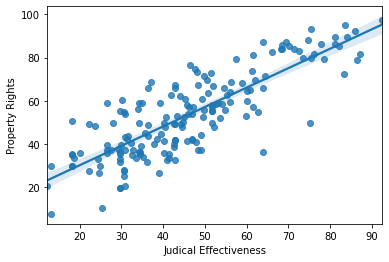

In [13]:
sns.regplot(x='Judical Effectiveness', y='Property Rights', data=data_eco_free)

### מצאנו
#### שמערכת משפט יעילה במדינות 
#### תועיל למימוש הזכות לחוק הקניין

<AxesSubplot:xlabel='Business Freedom', ylabel='Property Rights'>

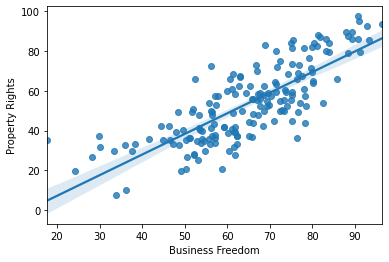

In [14]:
sns.regplot(x='Business Freedom', y='Property Rights', data=data_eco_free)

#### מצאנו
##### שככל שמתקיים יותר חופש עסקי במדינה
#####    תועיל למימוש  הזכות לחוק הקניין



<AxesSubplot:xlabel='Trade Freedom', ylabel='Tariff Rate (%)'>

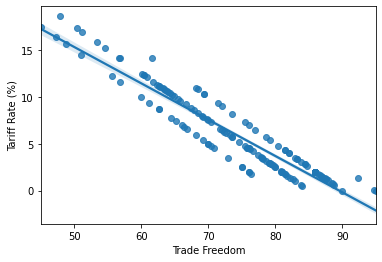

In [15]:
sns.regplot(x='Trade Freedom', y='Tariff Rate (%)', data=data_eco_free)

### מצאנו
#### שככל שיש יותר חופש מסחר במדינות 
#### אז ניתן לראות שגביית המכס נמוכה יותר

In [16]:
Israel = data_eco_free.loc[data_eco_free.WEBNAME == 'Israel'].copy()
Hong_Kong = data_eco_free.loc[data_eco_free.WEBNAME == 'HongKong'].copy()
Hong_Kong

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
72,71,Hong Kong,HongKong,Asia-Pacific,1.0,1.0,90.2,93.3,75.3,83.8,...,Hong Kong SAR,7.4,454.9,3.8,2.8,61393.0,3.1,1.5,"104,333.00",0.1


In [17]:
Israel

,CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2019 Score,Property Rights,Judical Effectiveness,Government Integrity,...,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
80,79,Israel,Israel,Middle East and North Africa,27.0,2.0,72.8,80.0,73.4,67.9,...,Israel,8.7,316.5,3.3,3.5,36340.0,4.3,0.2,"18,954.00",61.0


In [18]:
isl_hng = [Israel,Hong_Kong]
isl_hng_1 = pd.concat(isl_hng)

### ------------------------------------------------------------------------

# השוואה בין הונג-קונג לישראל
# ? מתי ניהיה הונג-קונג

### ? למה בחרנו את הונג-קונג  

#### החלטנו לבחור דווקא בהונג-קונג כי היא מקום ראשון  

#### ונבדוק מהם המדדים והמספרים על מנת להיות מקום ראשון במדד החופש כלכלי

#### ואנו נסקר את השוני בין המדינות  

In [19]:
rrr = isl_hng_1[['Country Name','Population (Millions)','GDP per Capita (PPP)','GDP (Billions, PPP)']]
#sns.catplot(x="Country Name", hue= 'Population (Millions)','GDP per Capita (PPP)','GDP (Billions, PPP)', kind="count", data=isl_hng_1)
#plt.show()
rrr

,Country Name,Population (Millions),GDP per Capita (PPP),"GDP (Billions, PPP)"
80,Israel,8.7,36340.0,316.5
72,Hong Kong,7.4,61393.0,454.9


#### טבלת השוואה בין ישראל להונג-קונג
##### ישראל גדולה בכמות התושבים מהונג-קונג
##### הונג-קונג מובילה בתוצר לנפש ובתוצר המדינה

### ------------------------------------------------------------------------

## נציג
### הבדלי החופשים בין המדינות -
###  את הבדלי האבטלה -
### הבדלי המס -
### הבדל הוצאות הממשלה באחוזים לטובת האזרחים -
### הבדל בין הממשלות (שלמות הממשלה ויעליות שיפוטית) -

In [20]:
free_il = isl_hng_1[['Country Name','Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom']]
free_il

,Country Name,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
80,Israel,71.4,65.1,86.2,84.4,75.0,70.0
72,Hong Kong,96.4,89.2,86.4,95.0,90.0,90.0


<AxesSubplot:xlabel='Country Name'>

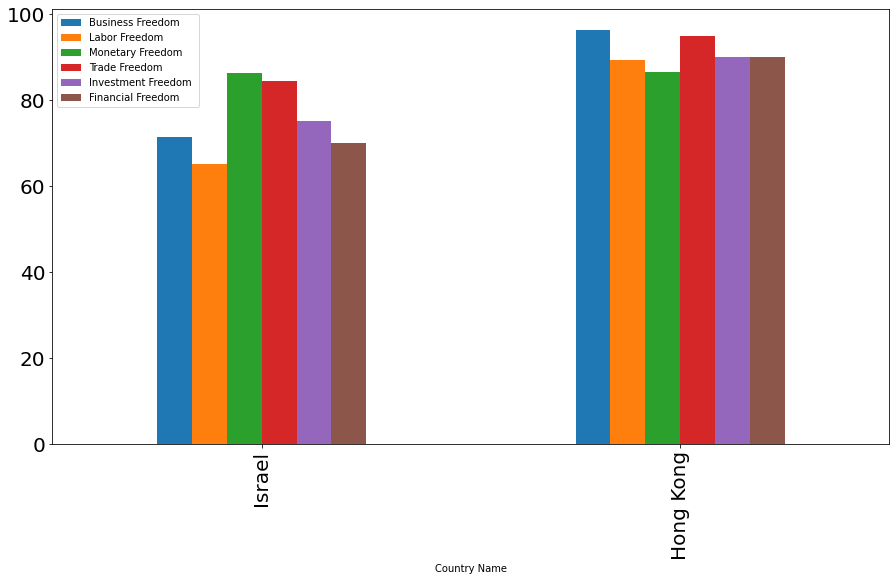

In [21]:
isl_hng_1.plot(x="Country Name", y=['Business Freedom', 'Labor Freedom', 'Monetary Freedom',
       'Trade Freedom', 'Investment Freedom ', 'Financial Freedom'], kind="bar",figsize=(15, 8),fontsize=20)

##### ניתן לראות שחופש הכספי בין המדינות דומה 
##### מדדי החופש בהונג-קונג גבוהים ונעים כולם מעל מדד ה80
##### לעומת ישראל שמדדי החופש נמוכים יותר ונעים בין 60 לקצת יותר מ80

[(0.0, 8.0)]

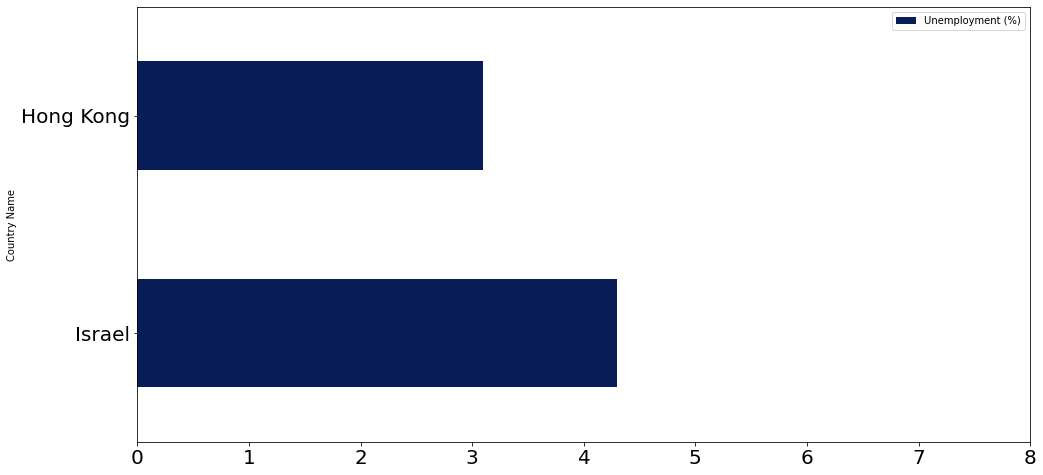

In [22]:
isl_hng_1.plot(x="Country Name", y=['Unemployment (%)'], kind='barh',figsize=(16, 8),fontsize=20,colormap='YlGnBu_r').set(xlim=(0,8))

##### הבדלי האבטלה בין ישראל להונג-קונג
###### מוצג באחוזים

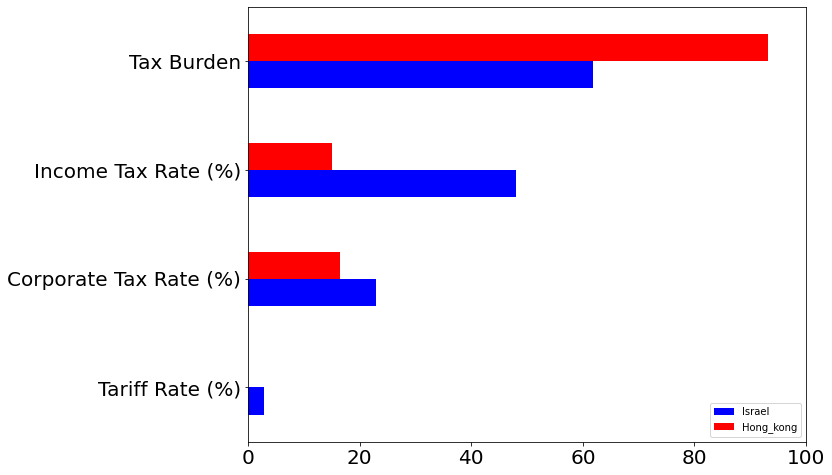

In [23]:
Israel = [2.8,23.0,48.0,61.9]
Hong_kong = [0.0,16.5,15.0,93.1]
index = ['Tariff Rate (%)', 'Corporate Tax Rate (%)', 'Income Tax Rate (%)','Tax Burden']
df = pd.DataFrame({'Israel': Israel,
                   'Hong_kong': Hong_kong}, index=index)
ax = df.plot.barh(figsize=(10, 8),fontsize=20,color='brb').set(xlim=(0,100))


In [24]:
isl_hng_1[['Country Name','Tariff Rate (%)', 'Corporate Tax Rate (%)', 'Income Tax Rate (%)','Tax Burden']]

,Country Name,Tariff Rate (%),Corporate Tax Rate (%),Income Tax Rate (%),Tax Burden
80,Israel,2.8,23.0,48.0,61.9
72,Hong Kong,0.0,16.5,15.0,93.1


##### אנו רואים שהממשלה בהונג-קונג מטילה יותר מס מאשר בישראל -
##### אנו רואים שאחוז ההכנסה ממסים בישראל גבוה יותר מבהונג-קונג -
##### אנו רואים שאחוז מס החברות בישראל קצת יותר גבוה מהונג-קונג -
##### אנו רואים שבישראל בשנת 2019 עלה תעריף המס לעומת הונג-קונג ללא שינוי -

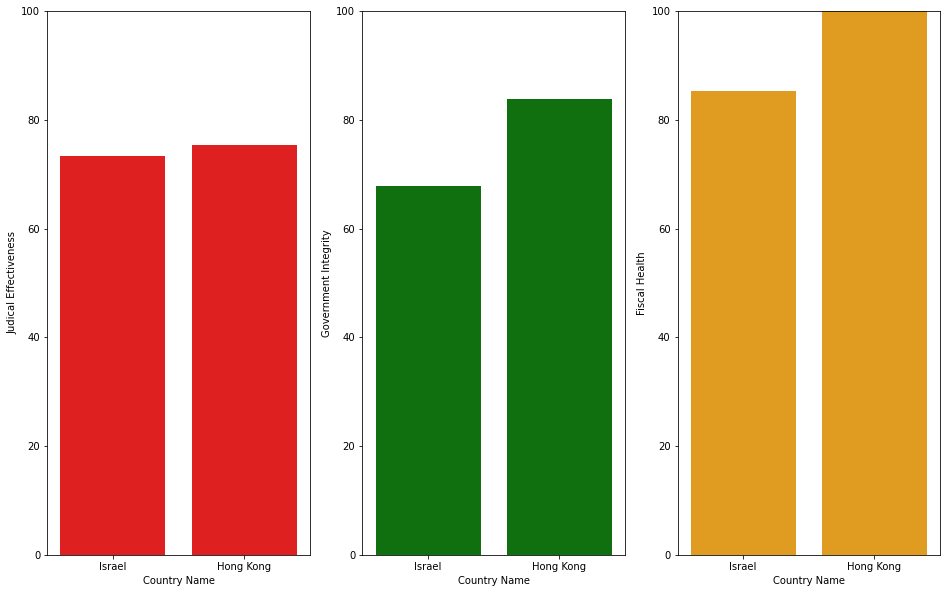

In [25]:
fig, axes = plt.subplots(figsize=(16, 10), ncols=3)
sns.barplot(ax=axes[0],x="Country Name", y="Judical Effectiveness",data=isl_hng_1, color="red").set(ylim=(0, 100))
sns.barplot(ax=axes[1],x="Country Name", y="Government Integrity",data=isl_hng_1,color="green" ).set(ylim=(0, 100))
sns.barplot(ax=axes[2],x="Country Name", y='Fiscal Health',data=isl_hng_1,color="orange" ).set(ylim=(0, 100))
plt.show()


##### היעילות השיפוטית של ישראל והונג-קונג כמעט באותה רמת דירוג
##### הממשלה של הונג-קונג מדורגת גבוה יותר ממשלת ישראל
#### הבריאות הכלכלית בהונג-קונג מדורג הכי גבוה לעומת ישראל שנשארת קצת מאחור


#### -----

#### אומנם ישראל לא רחוקה מאוד מבחינת המספרים להונג-קונג בשביל שנזכה לתואר המקום הראשון בממד החופש הכלכלי
#### אך יש עדין איפה להשתפר אם זה ברמות החופשים
###### (העבודה, הפננסי,העסקי וההשקעות)
#### התוצר לנפש של הונג-קונג גבוה יותר מבישראל וכן גם תוצר המדינה של הונג-קונג גבוה משל ישראל

### ------------------------------------------------------------------------
###### קצת לסדר את העניינים ולהזכיר שהדאטה נכון לשנת 2019
###### כייום לשנת 2021 הונג קונג כבר לא מחושבת במדד החופש הכלכלי


##  

In [26]:
features = [ 'Business Freedom', 'Labor Freedom', 'Monetary Freedom','Investment Freedom ','Trade Freedom','Financial Freedom']
X = data_eco_free[features]
y = data_eco_free['Fiscal Health']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42) 


In [1]:
X_train.head()

NameError: name 'X_train' is not defined

In [28]:
y_test.head()

174    82.6
43     80.3
96     63.5
62     93.9
123    93.9
Name: Fiscal Health, dtype: float64

In [29]:
model_financial = sk.tree.DecisionTreeRegressor(max_depth=4,random_state=42)
model_financial.fit(X_train, y_train)
def eval(x_test,y_test,model_financial):
    pred = model_financial.predict(x_test)
    print("MSE: {:.3f}".format(mse(pred,y_test,squared=False)))


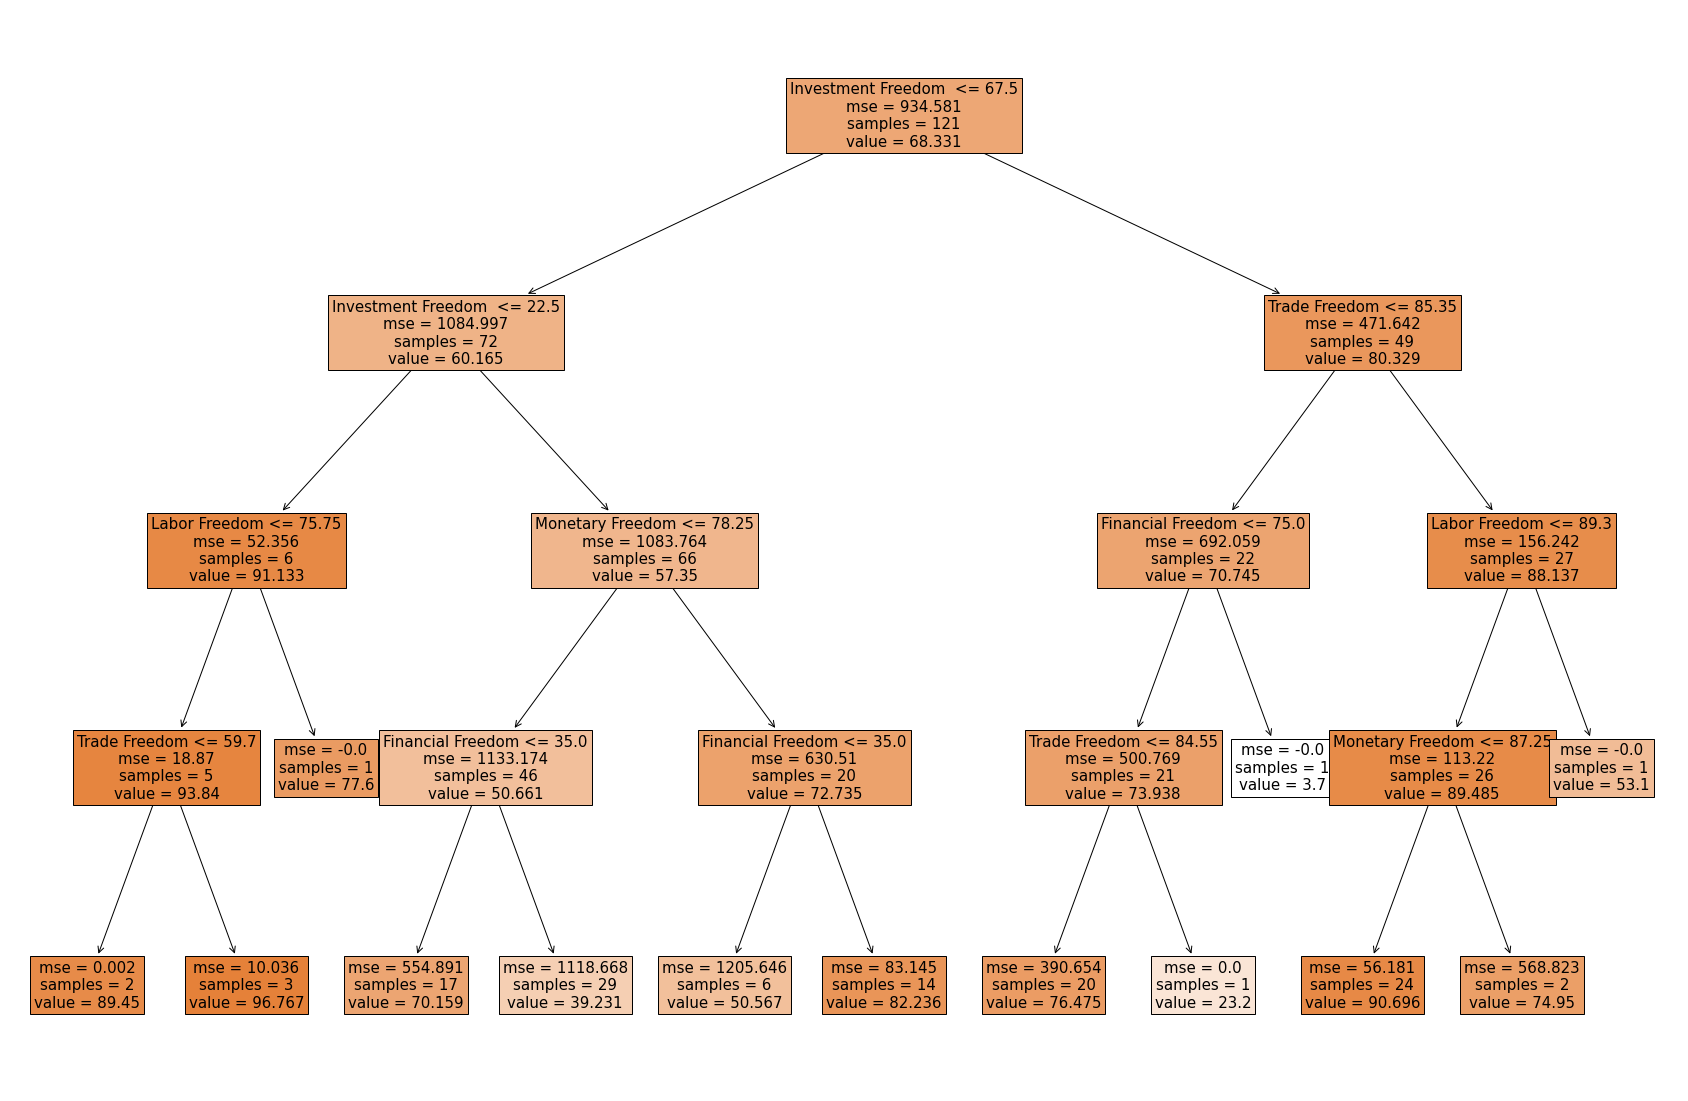

MSE: 36.145


In [30]:
import sklearn.tree as tree
def plot_tree(tree_model,feat,size=(15,10)):
    fig = plt.figure(figsize=size)
    tree.plot_tree(tree_model, 
                   feature_names = feat, 
                   filled=True,
                  fontsize=15)  
    plt.show()
plot_tree(model_financial,X_test.columns,size=(30,20))
eval(X_test,y_test,model_financial)

### מודל חיזוי עם פיצרים של כלל מדדי החופש
### וניבוי של הבריאות הכלכלית

## ---------------------------------------------------------------

# ! תודה רבה